In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
datadir = "/pauli-storage/tblommel/NEdyson_data/He-VB2PP/equilibrium/"
file = h5py.File(datadir + "nt4092_k5_dt0025_2B_tti.h5", "r")
nt = file["solve/params/nt"][()] + 1
ntau = file["solve/params/ntau"][()] + 1
nao = file["solve/params/nao"][()]
dt = file["solve/params/dt"][()]
beta = file["params/beta"][()]
G_R = np.reshape(file["G/GR"][()], (nt, nao, nao))
G_TV = np.reshape(file["G/GTV"][()],(nt,ntau, nao, nao))
print(beta)

10.0


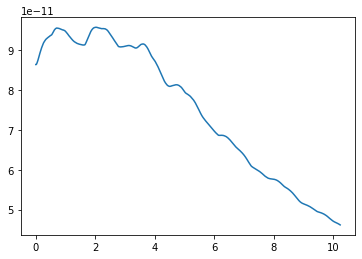

In [4]:
err = np.zeros(nt)
for t in np.arange(nt):
    err[t] = np.sum(np.abs(G_R[t] - (-G_TV[t,ntau-1] - G_TV[t,0])))
plt.plot(np.arange(nt) * dt, err)